In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from random import *

In [2]:
is_local = False
if (is_local):
        print("fail")
else:
        PATH = "./input/earthquake_data/"

In [3]:
file_len = len(os.listdir(PATH))
f"파일 갯수는 {file_len!r} 입니다 "

'파일 갯수는 2 입니다 '

In [4]:
data_list = os.listdir(PATH)
data_list

['3333940_0.dat', '3334089_0.dat']

In [5]:
path = PATH + data_list[1] 
path
data_df = pd.read_csv(path, names=['time', '_x', '_y', '_z'],header=None, error_bad_lines=False )

In [10]:
signals = data_df.copy()
signals = signals.drop('time',axis=1)
signals.head(5)

,_x,_y,_z
0,3.371620e-08,-7.718999e-08,3.106973e-09
1,3.202158e-08,-6.751933e-08,2.412234e-08
2,5.391698e-08,-4.778630e-08,2.974502e-08
3,4.776981e-08,-6.607367e-08,2.880523e-08
4,4.532062e-08,-5.082458e-08,3.259496e-08


In [11]:
signals.shape

(16138, 3)

In [12]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [13]:
fs = 200
x =  signals['_x'][0:7200] * random() * pow(10,6)
nperseg = 50
noverlap = 25
mode = complex

In [15]:
f, t, Sxx = signal.spectrogram(x, fs, 
                               nperseg = 256,
                              noverlap = 25)
#f, t, Sxx = signal.spectrogram(x, fs)

In [16]:
print(Sxx.shape)
print(Sxx)

(129, 31)
[[1.79570798e-05 6.67820902e-05 3.61191087e-06 ... 5.33946921e-05
  8.54762935e-06 2.22932961e-05]
 [2.97945473e-03 3.36055977e-03 2.49189973e-03 ... 1.99504445e-04
  3.94432886e-04 4.06110025e-03]
 [1.69486956e-03 7.72183244e-04 1.01121960e-03 ... 3.10392833e-03
  2.16730723e-03 1.38226418e-03]
 ...
 [2.85905412e-10 2.57220745e-12 2.07024522e-12 ... 2.12073816e-12
  6.88261289e-12 1.33465185e-12]
 [5.29453409e-10 2.09234930e-12 3.58342925e-13 ... 3.27353977e-12
  1.05590083e-12 3.63188741e-12]
 [7.76505879e-10 4.43340457e-12 8.98990189e-16 ... 1.34753065e-12
  6.87717797e-13 1.42148094e-12]]


<function matplotlib.pyplot.show(*args, **kw)>

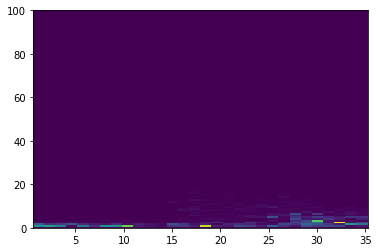

In [17]:
plt.pcolormesh(t, f, Sxx)
plt.show

In [13]:
Sxx.shape

(129, 31)

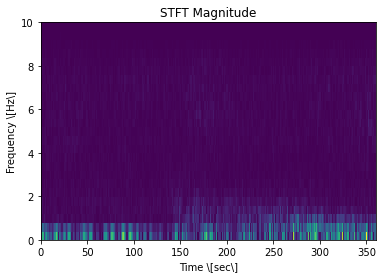

In [21]:
f, t, Zxx = signal.stft(x, fs, nperseg = 50,
                              noverlap = 25)  
plt.pcolormesh(t, f, np.abs(Zxx))  
plt.title('STFT Magnitude')  
plt.ylabel('Frequency \[Hz\]')  
plt.xlabel('Time \[sec\]')  
plt.show()

In [15]:
Sxx[32]

array([9.56356799e-19, 1.50623800e-17, 2.66327997e-17, 1.67646508e-17,
       7.89434169e-18, 5.47027807e-17, 1.40316988e-17, 1.47769716e-17,
       3.21158295e-17, 1.03061638e-17, 1.08551993e-18, 2.35850720e-18,
       3.51963394e-17, 4.92905261e-17, 1.92958094e-17, 1.53113087e-17,
       3.23849865e-17, 5.27912492e-18, 2.16782594e-17, 2.55080197e-17,
       2.12253874e-18, 2.21337885e-17, 8.41417059e-18, 1.07780973e-17,
       1.59035885e-18, 4.42819151e-18, 1.49247630e-18, 2.29781739e-17,
       2.17422017e-18, 1.15340395e-17, 8.67173914e-18])

## 히스토그램 기반 주파수 특징 추출

In [16]:
FrequencyArray = Sxx[:,0]
for i in range(1, Sxx.shape[1]):
    FrequencyArray =  Sxx[:,i] + FrequencyArray

print(FrequencyArray.shape)

(129,)


In [17]:
TimeArray = Sxx[0]
for i in range(1, Sxx.shape[0]):
    TimeArray += Sxx[i]  
print(TimeArray.shape)

(31,)


(array([123.,   3.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([4.73849785e-21, 5.84586646e-14, 1.16917324e-13, 1.75375984e-13,
        2.33834644e-13, 2.92293304e-13, 3.50751964e-13, 4.09210623e-13,
        4.67669283e-13, 5.26127943e-13, 5.84586603e-13]),
 <a list of 10 Patch objects>)

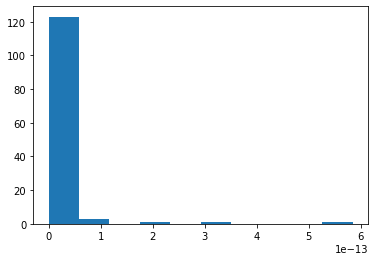

In [18]:
plt.hist(FrequencyArray)

In [19]:
print(len(f))
print(len(FrequencyArray))

129
129


In [20]:
TimeFrequencyArray = np.concatenate((TimeArray,FrequencyArray))
print(TimeFrequencyArray)
print(TimeFrequencyArray.shape)

[5.96850581e-14 5.36247086e-14 4.65181292e-14 2.52508516e-14
 4.07367194e-14 1.74833079e-14 4.48123962e-14 4.92745078e-14
 6.17578589e-14 1.47920233e-14 8.92693854e-15 6.41255825e-15
 3.70126434e-14 3.58470857e-14 2.90216837e-14 8.88469150e-14
 2.61686546e-14 2.21240429e-14 4.09499811e-14 4.52367198e-14
 2.79349011e-14 6.10042543e-14 4.95028856e-14 9.26619792e-14
 9.27497413e-14 1.45821582e-13 6.37101833e-14 1.11009744e-13
 7.01585830e-14 6.94838260e-14 9.47287663e-14 8.48194722e-15
 5.84586603e-13 3.23347100e-13 2.12317838e-13 1.00293672e-13
 6.50084758e-14 9.38680599e-14 3.19282987e-14 4.57167535e-14
 1.93561055e-14 1.54077200e-14 1.50470234e-14 1.53592224e-14
 9.48138151e-15 8.47332592e-15 7.08771206e-15 7.37810990e-15
 4.45840494e-15 5.49299346e-15 2.63186897e-15 3.40336813e-15
 2.39861495e-15 1.89498054e-15 1.14149154e-15 8.39879342e-16
 1.18990649e-15 8.15724313e-16 7.51415900e-16 7.05877314e-16
 4.53481400e-16 8.65201578e-16 3.60894847e-16 4.96950169e-16
 3.29027700e-16 3.038044